In [3]:
import sqlite3

In [4]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [5]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [6]:
sample_data = [
    ("Apple", 50, 20.0),
    ("Banana", 80, 10.0),
    ("Orange", 40, 15.0),
    ("Apple", 30, 20.0),
    ("Banana", 20, 10.0),
    ("Orange", 50, 15.0)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", sample_data)

In [7]:
conn.commit()
conn.close()

print("Database created successfully!")

Database created successfully!


In [8]:
pip install pandas matplotlib

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
conn = sqlite3.connect("sales_data.db")

In [11]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [12]:
df = pd.read_sql(query, conn)

In [13]:
conn.close()

In [14]:
print(df)

  product  total_qty  revenue
0   Apple         80   1600.0
1  Banana        100   1000.0
2  Orange         90   1350.0


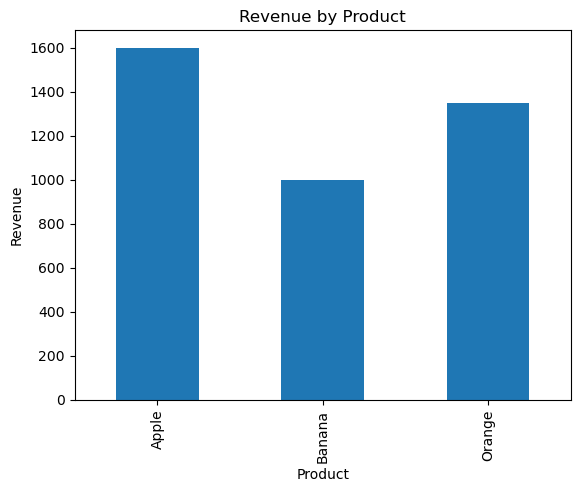

In [15]:
df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.savefig("sales_chart.png")  # saves the chart
plt.show()